## Naive Bayes

This notebook contains the implementation of the Naive Bayes classifier.

<b>Import libraries</b>

In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from src.main.models.naivebayes import Naivebayes
from src.main.pipeline.functions import clean_text, stop_words_removal, stemming, count_vectorizer, remove_contractions
from src.main.utilities.utils import get_dataset, split_train_val_test
import time

import warnings
warnings.filterwarnings("ignore")

<b>Define model and pipeline, apply pipeline to dataset</b>

In [3]:
# define model and pipeline
naivebayes = Naivebayes()
naivebayes.pipeline = [remove_contractions, clean_text, stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = naivebayes.run_pipeline(inputs, save=False)

In [4]:
# stratified train test split
x_train, x_val, x_test, y_train, y_val, y_test = split_train_val_test(inputs, targets, validation_size=0.2, test_size=0.1)

<b>Model fitting</b>

In [5]:
start = time.time()
naivebayes.fit(x_train, y_train)
end = time.time()
print("Elapsed:", end - start)

Elapsed: 0.17712712287902832


<b>Model evaluation</b>

['Life' 'Life' 'Entertainment' 'Entertainment' 'Voices' 'Politics' 'Life'
 'Politics' 'Life' 'Politics']


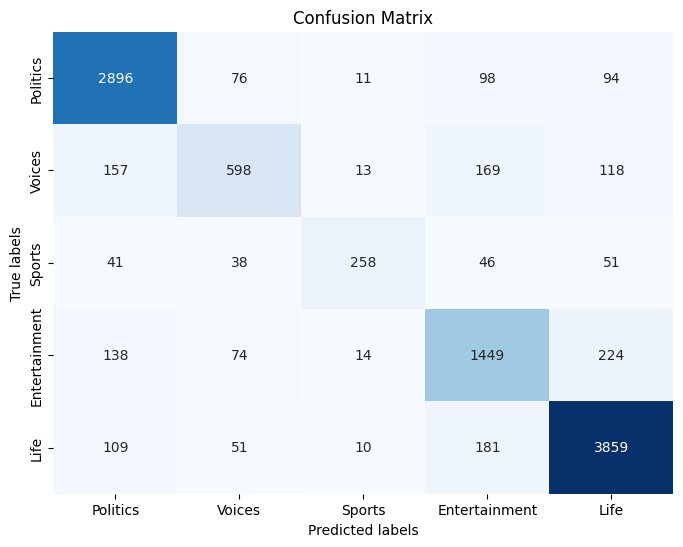

In [6]:
naivebayes.save_results(x_test, y_test)